In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Lecture de tous les mots
words = open('dataset/names.txt', 'r').read().splitlines()
words [:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
#Création des dictionnaires
chars = sorted(list(set(''.join(words)))) # estraction de chaque caracère de la liste de mots
stoi = {s:i+1 for i,s in enumerate(chars)} # Création d'un liste en commençant à l'indice 1 ou chaque caractère est associcé à un index
stoi['.'] = 0 #jout du caractère "." à l'indice 0
itos = {i:s for s,i in stoi.items()} # Création d'une liste inverse pour avoir le nombre et la corespondance du caractere
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
#Construction du dataset
block_size = 3 # taille du contexte dans cet exemple 

X, Y = [], [] #Création de deux liste X pour les entrées et Y pour la sortie attendue

for w in words:
    #print (w)
    context = [0] * block_size # On initie le contexte avec [0, 0, 0]
    for ch in w + '.': # Pour chauqe catactère du mot

        ix = stoi[ch] # On récupère la valeur du nombre correspondant à la lettre
        X.append(context) # On ajoute le contexte à la liste X
        Y.append(ix) # On ajoute la valeur numérique du caractère à la liste Y
        
        #On affiche le contexte + ----> + le caractère du mot que l'on traite 
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
        # La même chose mais on affiche les indexes
            #print(''.join(str(i) for i in context), '--->', ix)
 
        
        
        # On jette le premier élément du contexte et on d&calle tout a gauche
        #et on ajoute la valeur numérique de la lettre dans le contexte
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

n_lignes_exemples = X.shape[0]
        

In [5]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [6]:
#Création de la matrice des embeddings, ou chaque caractère est 
# représenté par une matrice a deux dimensions aléaroires pour commencer
C = torch.randn((27, 2))
#print (C)

In [7]:
######################################################
####### CONSTRUCTION DE LA COUCHE D'EMBEDDING ########
######################################################

In [8]:
# Embedding de la matric X
# A ce stade X contient les contexte de 3 index
# Le réseau ne peut pas travailler avec ces indexes c'est pourquoi on va 
# embedder X pour donner un représentation mathématique des caractères via
# des vecteurs denses
# Avant embedding = X[i] = [5, 13, 13]
# Après embedding = X[i] = [[1.7, -0.3], [0.2, +1.5], [0.2, +1.5]]
# [
      #C[5],    # embedding de 'e' → [1.7, -0.3]
      #C[13],   # embedding de 'm' → [0.2, +1.5]
      #C[13]    # embedding de 'm' → [0.2, +1.5]
# ]
emb = C[X]
# On obtient un tenseur de 32 lignes (le nombre d'exemple dans notre training set), dans chaque ligne 3 éléments (contexte) 
# et pour chaque élément la version embedder donc une matrice de 2 dimensions
emb.shape

torch.Size([228146, 3, 2])

In [9]:
######################################################
######### CONSTRUCTION DE LA HIDDEN LAYER ############
######################################################

In [10]:
#Initialisatin des poids aléatoirement
W1 = torch.randn((6, 100)) 
# 6 lignes car 
# 6 entrées car notre embedding contient 6 valeurs par ligne
# 3 lettres de contexte * 2 embedding par lettre  
# [[1.7, -0.3], [0.2, +1.5], [0.2, +1.5]]
# La matrice est applatit avant d'être envoyé au neuronne pour ne faire q'un seul vecteur
# [1.7, -0.3, 0.2, 1.5, 0.2, 1.5]   # vecteur de taille 6

# 100 neuronnes cachés avec 6 poids => Taille initié à l'expérience :) 

#Initialisation des biais aléatoirement
b1 = torch.randn(100)
# 100 biais car 100 neuronnes
#Chaque neuronne reçoit la valeur de l'embedding applati,


# Il fait son calcul tanh(aX + b) et en sortie on a une valeur
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

#Explication du emb.view
# A ce stade on veut muliplier une matrice emb de dimensions [32, 3, 2]
# par la matrice W1 de dimension [6, 100]
# Ce qui est imossible, la multiplication d'une matrice A par une matrice B impose
# que le nombre de colonne de la matrice A soit égal au nombre de ligne de la matrice B
# Il faut donc que la matrice emb ai 6 colonne (actuellement 3)
# la fonction view permet, sans créer de nouveau tenseur en mémoire, de transoformer 
# la forme de notre matrice et pour garder une forme dynamique on indique -1 au niveau
# de la ligne, torch sait alors que ce sera forcément 32 dans notre cas car il fait
# autmatiquement le calcul en fonction de la taille du tenseur d'origine
# origine 32 * 3 * 2 = 192 donc si on indique 6 il fait 192 / 6 pour déduire 32

print('shape emb :', emb.shape)
print('shape W1 :', W1.shape)
print('shape b1 :', b1.shape)
print('shape emb.view(-1, 6) :', emb.view(-1, 6).shape)

# La shape de h sera égale au nombre de ligne de la matrice emb.view(-1, 6) >> 32
# Et du nombre de colonne de la matrice W1 >> 100
# Règle de la multiplication des matrices

##  Règle mathématique d'addition de matrice, pour addition deux matrices il faut qu'elle soient de mêm taille :
# L'addition de emb.view(-1, 6) @ W1  b1 à 1 dimension  est possible grace au
# Broadcasting, qui va étendre automatiquement le plus petit vecteur pour que la forme soit compatible
# b1 est un vecteru composé d'une ligne et de 100 valeurs (colonnes)
# Pour permettre l'addition le broadcasting va répété virtuellement b1 sur 32 lignes
print('shape de h :', h.shape)

shape emb : torch.Size([228146, 3, 2])
shape W1 : torch.Size([6, 100])
shape b1 : torch.Size([100])
shape emb.view(-1, 6) : torch.Size([228146, 6])
shape de h : torch.Size([228146, 100])


In [11]:
######################################################
######## CONSTRUCTION DE LA COUCHE DE SORTIE #########
######################################################

In [12]:
#Initialisatin des poids aléatoirement
W2 = torch.randn((100, 27)) 
# 100 lignes car 
# 100 sorties de notre hidden layer (shape de h : torch.Size([32, 100]))
# 27 colonnes car 27 sortie étant données le nombre de caractère possible   

#Initialisation des biais aléatoirement
b2 = torch.randn(27)

#### 1. 27 Scores bruts non normalisés, un niveau "d'energie attribué a chaque caractère"
logits = h @ W2 + b2

#### On va calculer la probabilité
    # counts = logits.exp() # Transforme chaque score brut en nombre strictement positif 
    # on le divise par la valeur des sommes de toutes les colonnes pour en faire une moyenne »
    # prob = counts / counts.sum(1, keepdims=True) ## Normalisation pour que la somme d'une ligne soit égale à 1
##### prob contient 32 lignes (nombre d'exemple) et 27 colonne représentant chauqe caractère et la probabilité affecté a chaque caractère
##### Création d'un vecteur de 32 valeurs dans le quel on stock la valeur prédite par le modèle
##### Pour chaque caractère qui était attendu (donc ce n'est forcément celui qui a eu la meilleur probabilité
##### Ce qui est normal, à ce stade le modèle n'est pas encore entrainé)
    # preparationCalculLoss = prob[torch.arange(32), Y]
    # print (preparationCalculLoss)

##### On prend la probabilité du caractère correct, on prend son log, on met un signe moins, on moyenne :
##### c’est la Negative Log-Likelihood, la mesure standard de “à quel point le modèle a eu tort”.
##### C'est cette valeur que l'on va tenter de minimiser pour améliorer notre modèle
    # loss = -preparationCalculLoss.log().mean()
    # print (loss.item())

#### La fonction F.cross_entropy(logits, y) faile calcul du neagative loglikelihood de façon plus efficiente
#### cross_entropy fait tout en une seule opération efficace au lieu de 4 quand on le fait manuellement
#### cross_entropy est NUMÉRIQUEMENT STABLE >> 
    # Si un logit = 50 → exp(50) ≈ 5 × 10²¹ → explosion
    # Si un logit = –50 → exp(–50) ≈ 1.9e–22 → underflow
        # ➡️ aucun overflow
        # ➡️ aucun underflow
        # ➡️ même si les logits sont énormes
        # ➡️ gradients fiables
#### C’est plus rapide (implémenté en C++/CUDA)
     # loss = F.cross_entropy(logits, Y)
     # print('Caclul de la loss: ', loss)

######################################################
################### Entrainement #####################
######################################################
parameters = [C, W1, W2, b1, b2]
# Si on ne fait pas ça on a cette erreur
# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn
for p in parameters:
    p.requires_grad = True

# Afficher le nombre de paramètre
print('Notre modèle compte ',sum(p.nelement() for p in parameters), ' paramètres')

for k in range(10000): # Sur deux cents itérations

    #Construction d'un minibach
    # Le but ici est d'accélerer l'entrainement et de consommer moins de RAM et de CPU
    # Sans le batch, on fait entraine le réseau sur tout le dataset d'un coup
    # Donc on fait plus de 220k forward et backward avec toutes les données en même temps
    ix = torch.randint(0, X.shape[0], (32,)) #Cette ligne tire 32 indices aléatoires dans le dataset pour construire un mini-batch.

    # Remarque : 
            # ce batching implique parfois la réutilisatin du même exemple
            # Certains exemples ne seront pas utilisés (environ 40% sur des batch de 32 exemples dans 200 itérations)
            # Malgrés cela la descente de gradiant reste bonne
            # C'est la technique utilisé par les LLMs comme Llama ou Gemini
    
    # 1) Forward pass
    emb = C[X[ix]]    
    #Cette ligne remplace les indices des caractères du mini-batch par leur embedding dense, 
    #créant un tenseur [32,3,2] prêt pour la couche cachée.
    
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)   # Hidden layer [32, 100]
    logits = h @ W2 + b2           # Couche de sortie [32, 27] 
    loss = F.cross_entropy(logits, Y[ix]) # Calcul de la loss (exp + counts / counts.sum ...) 

    # 2) Backprop
    # Les gradients sont générés et stockés automatiquement par loss.backward() 
    # et on les efface manuellement juste après les avoir utilisés pour mettre à jour les poids
    for p in parameters:
        p.grad = None  
    
    loss.backward() 

    # 3) Gradient descent >> Mise à jour des poids
    for p in parameters:
        p.data += -0.001 * p.grad    # descente de gradiant

print(loss.item())


<h2 style="color: red;">🔥 Note sur la définition du learning rate</h2>

Pour trouver une bonne valeur du learning rate, La méthode utilisée en deep learning moderne :

On teste plusieurs learning rates :
par ex. [1e-4, 1e-3, 1e-2, 1e-1]

On lance quelques itérations pour chaque valeur

On observe la courbe de loss

✔ Le bon learning rate est : 
celui où la loss baisse rapidement sans instabilité et sans oscillations violentes

### 🔥 Qu’est-ce que torch.linspace ?

#torch.linspace(start, end, steps) crée un vecteur de valeurs régulièrement espacées entre start et end.
torch.linspace(0, 1, 5)
tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000]) >> 5 valeurs également espécées entre 0 et 1

Dans notre expérimentation, on va tester plusieurs valeurs possibles du learning rate.
 Le principe :
 - On boucle sur ~100 itérations d'entraînement pour chaque learning rate testé
 - À chaque essai, on enregistre : 
       • la valeur du learning rate utilisé
       • la loss obtenue après ces itérations
 - Ensuite, on trace une courbe (loss en fonction du learning rate)
   afin d’identifier la valeur qui permet au modèle d’apprendre le plus efficacement.

 Cette méthode est une pratique courante en deep learning : elle permet de choisir
 un learning rate qui fait descendre la loss rapidement, sans instabilités.

Une fois le learning rate optimal identifié, on entraîne le modèle avec cette valeur jusqu’à atteindre un palier (plateau de loss).
Pour affiner encore la convergence, on réduit ensuite le learning rate d’un facteur 10 et on continue l’entraînement : cela permet souvent de diminuer la loss un peu plus finement.


<h2 style="color: red;">🔥 Le standart dans les entrainements de modèle est de découper le dataset en 3 parties
</h2>

#### ---> La partie entrainement (80% des données)
 ####     -  pour entrainer les paramètres du modèle C, W1, W2, b1, b2
#### ---> La partie dev / validation (10% des données)
 ####     -pour tester les hyperparamètres learning rate, taille du batch, dimensions de embeddings, taille du hiden                layer, architecture
#### ---> La partie test (10% des données)

In [127]:
######################################################
## Création des datasets d'entainement/ dev / test ###
######################################################

# Création d'une fonction réutilisatble
def build_dataset(words):
    block_size = 3 # taille du contexte dans cet exemple 
    
    X, Y = [], [] #Création de deux liste X pour les entrées et Y pour la sortie attendue
    
    for w in words:
        context = [0] * block_size # On initie le contexte avec [0, 0, 0]
        for ch in w + '.': # Pour chauqe catactère du mot
    
            ix = stoi[ch] # On récupère la valeur du nombre correspondant à la lettre
            X.append(context) # On ajoute le contexte à la liste X
            Y.append(ix) # On ajoute la valeur numérique du caractère à la liste Y
            
            # On jette le premier élément du contexte et on d&calle tout a gauche
            #et on ajoute la valeur numérique de la lettre dans le contexte
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    #print(X.shape, Y.shape)
    return X, Y

# Utilisation de la fonction pour créer les différents dataset
import random
random.seed(42)
random.shuffle(words) # On mélange aléatoirment la liste de mot
n1 = int(0.8*len(words))
print(n1)
n2 = int(0.9*len(words))
print(n2)

Xtr, Ytr = build_dataset(words[:n1]) # On créer une liste avec les mots compris dans le mot 1 et le mot 25626 (80%)
Xdev, Ydev = build_dataset(words[n1:n2]) # On créer une liste avec les mots compris  entre le mot 25626 et le mot 28829 (10%)
Xte, Yte = build_dataset(words[n2:]) # On créer une liste avc les mots après 28829 (10%)

print('dataset d\'entrainement : ', Xtr.shape[0], ' trigrammes')
print('dataset de dev / Validation : ', Xdev.shape[0], ' trigrammes')
print('dataset de test : ', Xte.shape[0], ' trigrammes')

25626
28829
dataset d'entrainement :  182762  trigrammes
dataset de dev / Validation :  22644  trigrammes
dataset de test :  22740  trigrammes


In [219]:
######################################################
################### PARAMÈTRES #######################
######################################################
pw1 = 200 ## Nb de poids dans la hidden couche
pemb = 20 ## Nb de dimensions dans l'embeddding
nbcar = 27 ## Nb de caractères
pembXtrig = pemb * block_size # la taille du contexte * la taille de l'embedding
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((nbcar, pemb)) # Couche d'embedding
W1 = torch.randn((pembXtrig, pw1)) # Poids Hidden Layer
b1 = torch.randn(pw1) # Biais Hidden layer
W2 = torch.randn((pw1, nbcar)) # Poids sortie
b2 = torch.randn(nbcar) # Biais sortie
parameters = [C, W1, W2, b1, b2]

# Afficher le nombre de paramètre
print('Notre modèle compte ',sum(p.nelement() for p in parameters), ' paramètres')

# Si on ne fait pas ça on a cette erreur
# RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn
for p in parameters:
    p.requires_grad = True

lre = torch.linspace (-3, 0, 60000) ##génère 60000 valeurs iniformément réparties entre -3 et 0
#print (lre) # tensor([-3.0000, -2.9970, -2.9940, -2.9910, -2.9880, -2.9850, ...]
lrs = 10**lre # Exponentiel en base 10 à chaque élément > Transforme les exposants lre en learning rates
# Permte de tester sur différents ordre de grandeur (0,1 / 0,01 / 0,001 ...)  pliutot que sue un espacement linéaire (-3.0000, -2.9970, -2.9940)
#print (lrs) # ([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011, ...]

Notre modèle compte  18167  paramètres


In [220]:
lri, lossi, stepi = [], [], [] ## Stockage des learning rates essayé avec les les loss asosciés 

In [225]:
######################################################
################### ENTRAINEMENT #####################
######################################################
batchSize = 128

for i in range(80000): 

    #Construction d'un minibach
    ix = torch.randint(0, Xtr.shape[0], (batchSize,)) #Cette ligne tire 32 indices aléatoires dans le dataset pour construire un mini-batch.
    
    # 1) Forward pass

    # 1.1) Embedding
    emb = C[Xtr[ix]]    
    #Cette ligne remplace les indices des caractères du mini-batch par leur embedding dense, 
    #créant un tenseur [32,3,2] prêt pour la couche cachée.

    # 1.2) Hidden layer
    h = torch.tanh(emb.view(-1, pembXtrig) @ W1 + b1)   # Hidden layer [32, 100]

    # 1.3) Sortie 
    logits = h @ W2 + b2           # Couche de sortie [32, 27] 
    
    loss = F.cross_entropy(logits, Ytr[ix]) # Calcul de la loss (exp + counts / counts.sum ...) 

    # 2) Backprop
    for p in parameters:
        p.grad = None  
    loss.backward() 

    # 3) Mise à jour des lri et lossi
    #lr = lrs[i]
    lr = 0.015

    # 3) Gradient descent >> Mise à jour des poids
    for p in parameters:
        p.data += -lr * p.grad    # descente de gradiant

    # Track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())

## Affiché la courbe avec matplot des learning rates et loss pour voir ou se situe le learnig rate le plus efficace et stable
#plt.figure(figsize=(10,5))
#plt.plot(lrs[:len(lossi)], lossi)
#plt.xscale('log')
#plt.xlabel('Learning rate (log scale)')
#plt.ylabel('Loss')
#plt.title('LR Finder – Evolution de la loss en fonction du learning rate')
#plt.grid(True)
#plt.show()

#print('Loss Entrainement: ',loss.item())

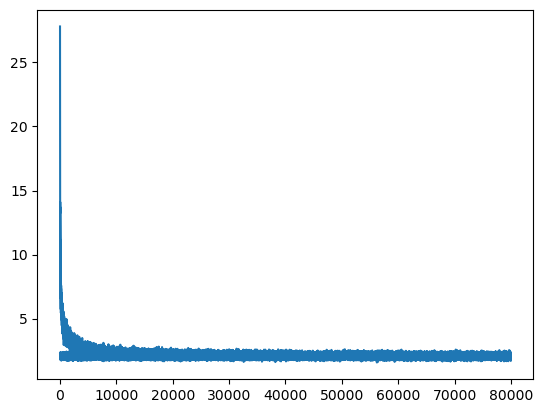

In [226]:
plt.plot(stepi, lossi)

In [227]:
######################################################
###### EVALUATION AVEC DONNÉES D'ENTRAINEMENT ########
######################################################
# Embedding
emb = C[Xtr]
# 1.2) Hidden layer [32, 100]
h = torch.tanh(emb.view(-1, pembXtrig) @ W1 + b1)  
# 1.3) Sortie [32, 27]
logits = h @ W2 + b2      
lossEval = F.cross_entropy(logits, Ytr)
print('Loss Fin entrainement : ',lossEval.item())

Loss Fin entrainement :  2.039626121520996


In [228]:
######################################################
###### EVALUATION AVEC DONNÉES DE VALIDATION #########
######################################################
# Embedding
emb = C[Xdev]
# 1.2) Hidden layer [32, 100]
h = torch.tanh(emb.view(-1, pembXtrig) @ W1 + b1)  
# 1.3) Sortie [32, 27]
logits = h @ W2 + b2      
lossEval = F.cross_entropy(logits, Ydev)
print('Loss Dev: ',lossEval.item())

Loss Dev:  2.149564743041992


<h2 style="color: red;">🔥 Note sur l'entrainement</h2>

### Il faut tester différentes variations de hyperparamètres 
#### * Variation de la taille des embeddiings des caractères
#### * Variation de la taille du hiden layer (nombre de neuronne)
#### * Refaire le calcul du learning rate le plus adapté lors des chnagements

### L'objectif étant d'avoir la losss la plus basse possible

<table border="1" cellpadding="8" style="border-collapse: collapse; text-align: center;">
  <thead style="background-color:#blue;">
    <tr>
      <th>Mesure</th>
      <th>Embedding 2 dims<br>Hidden 100 neurones</th>
      <th>Embedding 10 dims<br>Hidden 300 neurones</th>
      <th>Embedding 20 dims<br>Hidden 100 neurones</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>Total paramètres</b></td>
      <td> 3481 </td>
      <td> 17697 </td>
      <td> 18167 </td>
    </tr>
    <tr>
      <td><b>Learning rate utilisé</b></td>
      <td> 0.1 </td>
      <td> 0.15 </td>
      <td> 0.15 </td>
    </tr>
    <tr>
      <td><b>Taille du batch utilisé</b></td>
      <td> 32 </td>
      <td> 32 </td>
      <td> 128 </td>
    </tr>
    <tr>
      <td><b>Traitement complémentaire avec affinage du learning rate</b></td>
      <td> 0.01 </td>
      <td> 0.015 </td>
      <td> 0.015 </td>
    </tr>
    <tr>
      <td><b>Loss obtenue</b></td>
      <td> 2.6</td>
      <td> 2.06</td>
      <td> 2.03</td>
    </tr>
  </tbody>
</table>




# Fin de makemore partie 2